In [21]:
#importar pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#importar o arquivo csv results/resultados.csv

dftatt = pd.read_csv('../results/resultados_tatt.csv')
dfchr = pd.read_csv('../results/resultados_chr.csv')

minidftatt = pd.read_csv('../results/miniResultados_tatt.csv')
minidfchr = pd.read_csv('../results/miniResultados_chr.csv')

In [23]:
#juntar os dois dataframes separados por algoritmo
dfmerge = pd.merge(dftatt, dfchr, on='Dataset', suffixes=('_tatt', '_chr'), how='inner')

#Dropar Algorithm_tatt, Algorithm_chr, Quality_tatt, Optimal_tatt, numberNodes_tatt,Weight_tatt, Weight_chr
dfmerge = dfmerge.drop(columns=['Algorithm_tatt', 'Algorithm_chr', 'Otimal Threshold_tatt', 'numberNodes_tatt', 'Weight_tatt', 'Weight_chr'])

#trocar o nome Otimal Threshold_tatt para OtimalThreshold, numberNodes_chr para numberNodes
dfmerge = dfmerge.rename(columns={'Otimal Threshold_chr': 'OtimalThreshold', 'numberNodes_chr': 'numberNodes'})

#reorganizar os dados
dfmerge = dfmerge[['Dataset', 'numberNodes', 'OtimalThreshold' , 'ExecutionTime_tatt', 'MemoryUsage_tatt', 'Quality_tatt', 'ExecutionTime_chr', 'MemoryUsage_chr', 'Quality_chr']]

dfmerge.head()

,Dataset,numberNodes,OtimalThreshold,ExecutionTime_tatt,MemoryUsage_tatt,Quality_tatt,ExecutionTime_chr,MemoryUsage_chr,Quality_chr
0,eil51,51,426,0.036253,64.15625,1.370892,0.045379,64.78125,1.084507
1,berlin52,52,7542,0.035594,65.40625,1.341024,0.048758,65.40625,1.139088
2,st70,70,675,0.023307,66.28125,1.315556,0.082741,66.53125,1.140741
3,eil76,76,538,0.023980,67.03125,1.293680,0.084710,67.40625,1.130112
4,pr76,76,108159,0.025139,68.28125,1.343725,0.094341,68.28125,1.078819


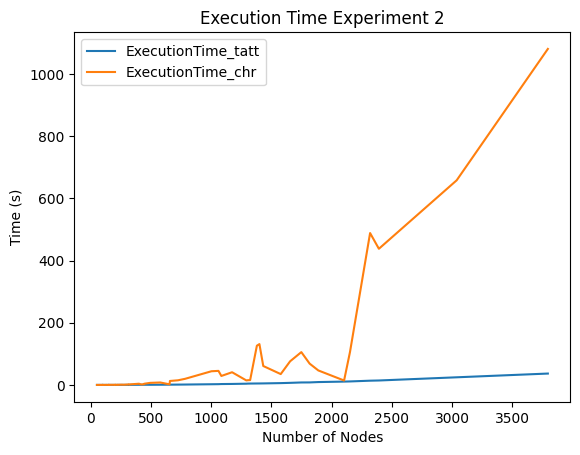

In [24]:
#tempo de execuçao dos algoritmos
#plotar, mostrar e salvar os graficos de linhas começando na mesma origem
#x deve ser em relaçao ao numero de nos e y em relaçao ao tempo de execuçao dos algoritmos
dfmerge.plot(x='numberNodes', y=['ExecutionTime_tatt', 'ExecutionTime_chr'])
plt.title('Execution Time Experiment 2')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (s)')
plt.legend()
plt.savefig('../results/ExecutionTime.png')
plt.show()


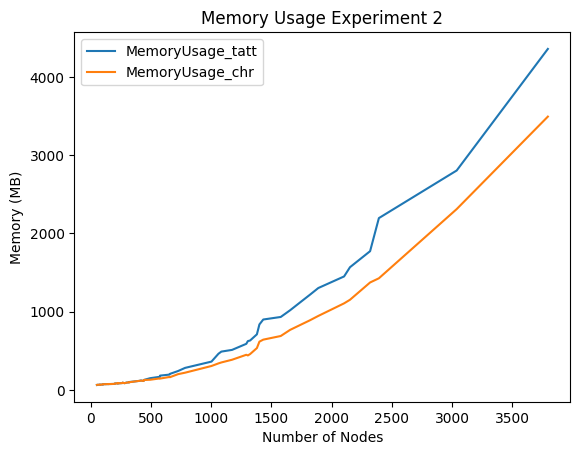

In [25]:
#memoria dos algoritmos
#plotar, mostrar e salvar os graficos de linhas começando na mesma origem
#x deve ser em relaçao ao numero de nos e y em relaçao ao tempo de execuçao dos algoritmos

dfmerge.plot(x='numberNodes', y=['MemoryUsage_tatt', 'MemoryUsage_chr'])
plt.title('Memory Usage Experiment 2')
plt.xlabel('Number of Nodes')
plt.ylabel('Memory (MB)')
plt.legend()
plt.savefig('../results/MemoryUsage.png')
plt.show()

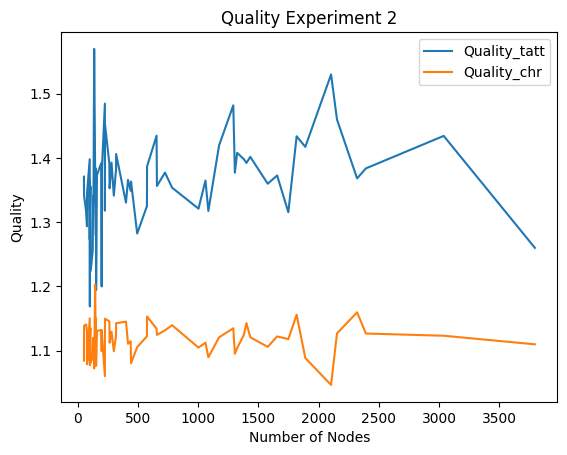

In [26]:
#qualidade dos algoritmos
#plotar, mostrar e salvar os graficos de linhas começando na mesma origem
#x deve ser em relaçao ao numero de nos e y em relaçao ao tempo de execuçao dos algoritmos
dfmerge.plot(x='numberNodes', y=['Quality_tatt', 'Quality_chr'])
plt.title('Quality Experiment 2')
plt.xlabel('Number of Nodes')
plt.ylabel('Quality')
plt.legend()
plt.savefig('../results/Quality.png')
plt.show()



In [27]:
#juntar os minidf assim como foi feito com o dfmerge
minidfmerge = pd.merge(minidftatt, minidfchr, on='Dataset', suffixes=('_tatt', '_chr'), how='inner')

#Dropar Algorithm_tatt, Algorithm_chr, Quality_tatt, Optimal_tatt, numberNodes_tatt,Weight_tatt, Weight_chr
minidfmerge = minidfmerge.drop(columns=['Algorithm_tatt', 'Algorithm_chr', 'Otimal Threshold_tatt', 'numberNodes_tatt', 'Weight_tatt', 'Weight_chr'])

#trocar o nome Otimal Threshold_tatt para OtimalThreshold, numberNodes_chr para numberNodes
minidfmerge = minidfmerge.rename(columns={'Otimal Threshold_chr': 'OtimalThreshold', 'numberNodes_chr': 'numberNodes'})

#reorganizar os dados
minidfmerge = minidfmerge[['Dataset', 'numberNodes', 'OtimalThreshold' , 'ExecutionTime_tatt', 'MemoryUsage_tatt', 'Quality_tatt', 'ExecutionTime_chr', 'MemoryUsage_chr', 'Quality_chr']]

#ordenar os dados por numero de nos
minidfmerge = minidfmerge.sort_values(by=['numberNodes'])

minidfmerge.head()


,Dataset,numberNodes,OtimalThreshold,ExecutionTime_tatt,MemoryUsage_tatt,Quality_tatt,ExecutionTime_chr,MemoryUsage_chr,Quality_chr
1,eil51,51,426,0.028319,165.203125,1.370892,0.055228,165.203125,1.084507
3,berlin52,52,7542,0.041454,203.558594,1.341024,0.067684,203.558594,1.139088
4,st70,70,675,0.039030,203.558594,1.315556,0.104176,203.558594,1.140741
7,eil76,76,538,0.038504,184.347656,1.293680,0.099862,184.347656,1.130112
9,pr76,76,108159,0.038110,182.472656,1.343725,0.085334,182.472656,1.078819


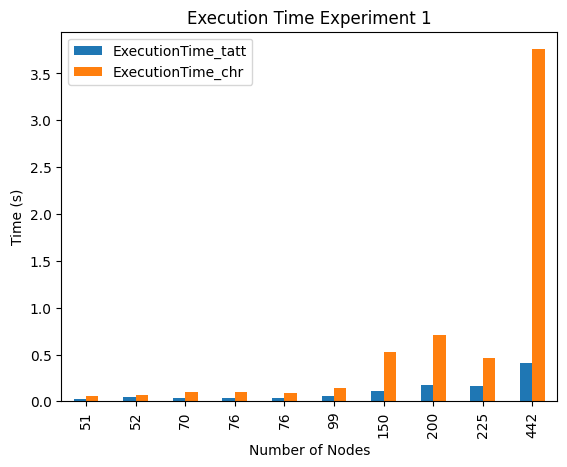

In [28]:
#plotar graficos de barras para os algoritmos de minidfmerge
#tempo de execuçao dos algoritmos

minidfmerge.plot(x='numberNodes', y=['ExecutionTime_tatt', 'ExecutionTime_chr'], kind='bar')
plt.title('Execution Time Experiment 1')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (s)')
plt.legend()
plt.savefig('../results/ExecutionTime_bar.png')
plt.show()


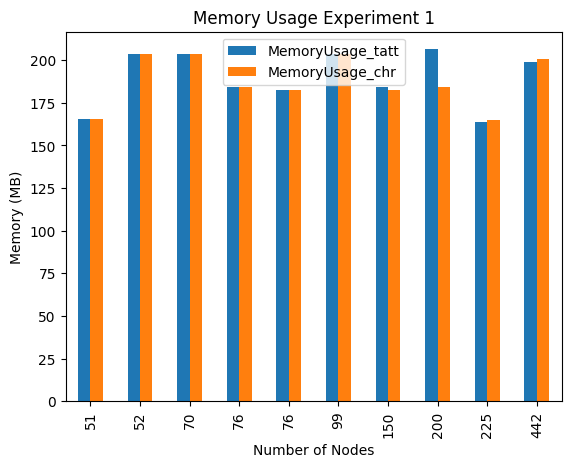

In [29]:
#plotar graficos de barras para os algoritmos de minidfmerge
#memoria dos algoritmos
minidfmerge.plot(x='numberNodes', y=['MemoryUsage_tatt', 'MemoryUsage_chr'], kind='bar')
plt.title('Memory Usage Experiment 1')
plt.xlabel('Number of Nodes')
plt.ylabel('Memory (MB)')
plt.legend()
plt.savefig('../results/MemoryUsage_bar.png')
plt.show()

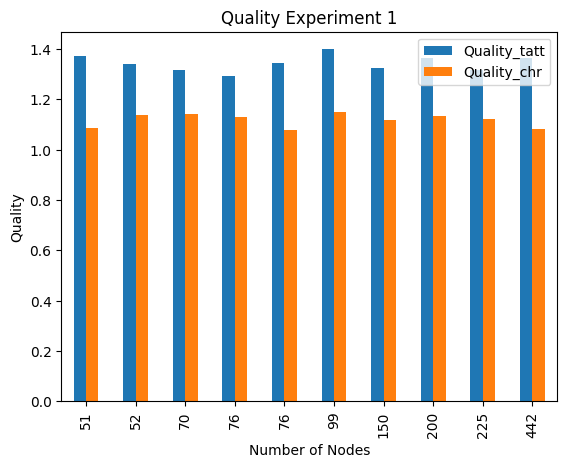

In [30]:
#plotar graficos de barras para os algoritmos de minidfmerge
#qualidade dos algoritmos
minidfmerge.plot(x='numberNodes', y=['Quality_tatt', 'Quality_chr'], kind='bar')
plt.title('Quality Experiment 1')
plt.xlabel('Number of Nodes')
plt.ylabel('Quality')
plt.legend()
plt.savefig('../results/Quality_bar.png')
plt.show()
